In [12]:
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [13]:
data_folders= [
    "FixedT2TDist", # Moving exciter but keeping t2t dist constant at a step
    "FixedTTEDists", # not moving anything just changing the step
]

err_correction_type="pretrained" #[no, gt, pretrained]
# freqs_to_use=[775e6, 815e6, 875e6, 915e6, 975e6]
freq_to_use=915e6

In [14]:
lambda_ = 3e8/915e6
th_phi = 2*np.pi*(112.2/100)/lambda_
th_phi = th_phi % (np.pi)

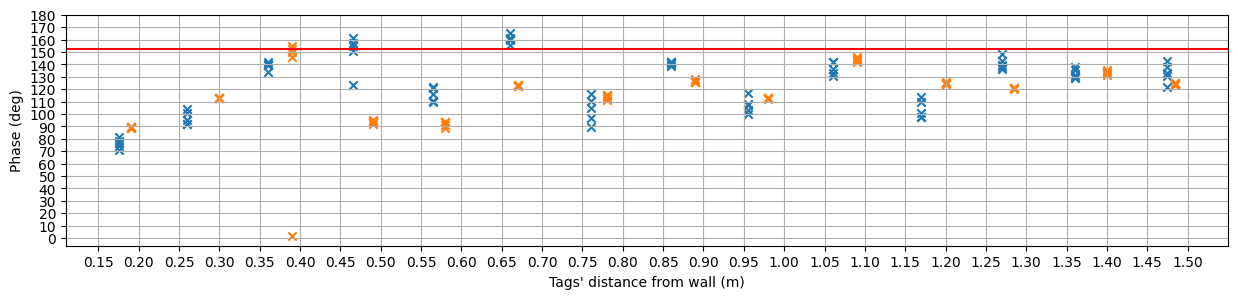

In [15]:
plt.figure(figsize=(15,3))
plt.axhline(y=np.rad2deg(th_phi), color='r', linestyle='-', label="expected phase")
x_tick_array=[]
for db in data_folders:
    with open(f"{db}/{err_correction_type}_correction_all_phases.pkl",'rb') as f:
        all_freqs=pickle.load(f)
    
    with open(f"{db}/processedDF_aggregated.pkl",'rb') as f:
        processedDF_aggregated=pickle.load(f)
    x=[]
    
    for i in processedDF_aggregated["wall dist"].unique():
        x+=[i]*5
        
    plt.scatter(x, np.rad2deg(all_freqs[915e6][1.122]), marker='x')
    # x_tick_array+=list(processedDF_aggregated["wall dist"].unique())
    x_tick_array.append(list(processedDF_aggregated["wall dist"].unique()))
    plt.yticks(np.arange(0,181,10))

    plt.xlabel("Tags' distance from wall (m)")
    plt.ylabel("Phase (deg)")

# plt.xticks(x_tick_array[0])
plt.xticks(np.arange(0.15,1.51,0.05))
plt.grid()


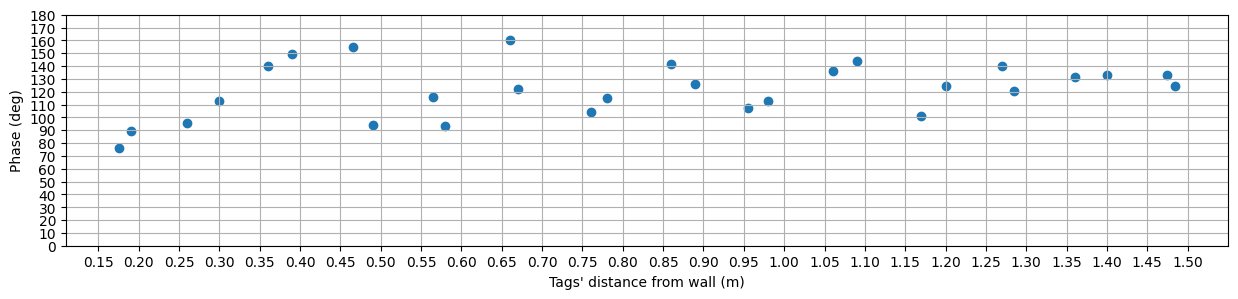

In [16]:
all_x = []
all_phases = []

plt.figure(figsize=(15,3))

for db in data_folders:

    with open(f"{db}/{err_correction_type}_correction_all_phases.pkl",'rb') as f:
        all_freqs = pickle.load(f)

    with open(f"{db}/processedDF_aggregated.pkl",'rb') as f:
        processedDF_aggregated = pickle.load(f)
    
    # Extract x values
    x_vals = sorted(processedDF_aggregated["wall dist"].unique())
    
    # Extract & compute median-filtered phases
    db_phases = np.rad2deg(all_freqs[915e6][1.122])
    phases = [np.median(db_phases[i:i+5]) for i in range(0, len(db_phases), 5)]

    # Skip folder if lengths don't match
    if len(x_vals) != len(phases):
        print(f"Skipping {db}: length mismatch x={len(x_vals)}, phases={len(phases)}")
        continue
    
    # Accumulate
    all_x.extend(x_vals)
    all_phases.extend(phases)

# ---- Sort merged data by x ----
all_x = np.array(all_x)
all_phases = np.array(all_phases)

sorted_indices = np.argsort(all_x)

all_x = all_x[sorted_indices]
all_phases = all_phases[sorted_indices]

# ---- Plot ----
plt.scatter(all_x, all_phases)

plt.yticks(np.arange(0, 181, 10))
plt.xticks(np.arange(0.15, 1.51, 0.05))
plt.grid()

plt.xlabel("Tags' distance from wall (m)")
plt.ylabel("Phase (deg)")
plt.show()


In [17]:
all_x

array([0.175, 0.19 , 0.26 , 0.3  , 0.36 , 0.39 , 0.465, 0.49 , 0.565,
       0.58 , 0.66 , 0.67 , 0.76 , 0.78 , 0.86 , 0.89 , 0.955, 0.98 ,
       1.06 , 1.09 , 1.17 , 1.2  , 1.27 , 1.285, 1.36 , 1.4  , 1.475,
       1.485])

In [18]:
all_phases

array([ 76.25714475,  89.31387178,  95.48621962, 112.72668868,
       139.71552987, 149.65293332, 154.65795653,  93.75322976,
       116.10830613,  93.47638671, 160.09344927, 122.20702638,
       104.46773963, 114.75442666, 141.74674689, 126.12092702,
       107.03184091, 112.86636984, 136.01666867, 143.70506141,
       100.8040575 , 124.6326144 , 139.69087654, 120.70847766,
       131.37451552, 133.1986658 , 133.23617457, 124.27016552])